In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import scale
import sklearn
%matplotlib inline

In [2]:
trip_dataset = pd.read_csv('../Datasets/trip_dataset.csv')

In [3]:
x = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance','rain','temp','snow','windspeed']].fillna(0)

#x = scale(x)

In [4]:
trip_dataset['trip_duration'] = np.log(trip_dataset['trip_duration'])
y = trip_dataset['trip_duration']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [6]:
model = RandomForestRegressor(criterion='mse')
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
Y_pred = model.predict(X_train)
#RMSE on train data
print(np.sqrt(metrics.mean_squared_error(y_train, Y_pred)))

0.0938536797763


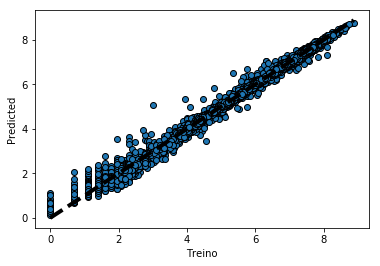

In [8]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y_train, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()

In [9]:
Y_pred = model.predict(X_test)
#RMSE on test data
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

0.212435856595


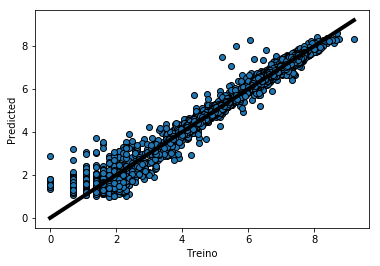

In [10]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()

In [11]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestRegressor()

In [12]:
results = model_selection.cross_val_score(model, x, y, cv=kfold)
Y_pred =  model_selection.cross_val_predict(model, x, y, cv=kfold)

In [13]:
print(np.sqrt(metrics.mean_squared_error(y, Y_pred)))

0.221085403726


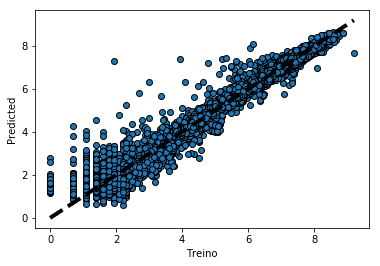

In [14]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()

In [15]:
print(r2_score(y, Y_pred, multioutput='variance_weighted'))

0.98107560585


In [16]:
print(np.std(results))

0.00216620011205
